In [38]:
# Nasser Althaiban                      Homework 2                               800764203

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [37]:
dataset.head()
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [32]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = dataset.iloc[:, 8].values

In [33]:
X[0:10]


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [7]:
Y[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=101)

In [9]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
Y_train shape: (614,)
Y_test shape: (154,)


In [10]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [12]:
Y_pred = classifier.predict(X_test)

In [13]:
Y_pred[0:9]

array([0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix
#print(classification_report(Y_test,Y_pred))

array([[90, 13],
       [18, 33]], dtype=int64)

In [15]:
##  Problem 1 solution:


from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall   :",metrics.recall_score(Y_test, Y_pred))

Accuracy : 0.7987012987012987
Precision: 0.717391304347826
Recall   : 0.6470588235294118


Text(0.5, 257.44, 'Predicted label')

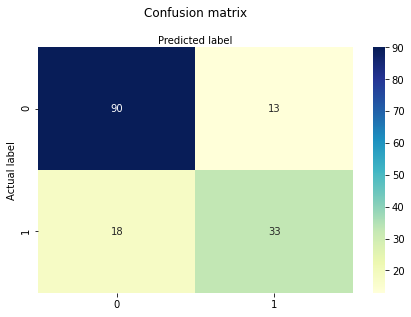

In [16]:
import seaborn as sns
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap


In [18]:
## Problem 2
## Naive Bayes method
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)


GaussianNB()

In [19]:
Y2_pred = classifier.predict(X_test)

In [20]:
Y2_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cnf_matrix = confusion_matrix(Y_test, Y2_pred)
#ac = accuracy_score(Y_test, Y2_pred)

In [22]:
print("Accuracy :",metrics.accuracy_score(Y_test, Y2_pred))
print("Precision:",metrics.precision_score(Y_test, Y2_pred))
print("Recall   :",metrics.recall_score(Y_test, Y2_pred))

Accuracy : 0.7532467532467533
Precision: 0.6226415094339622
Recall   : 0.6470588235294118


Text(0.5, 257.44, 'Predicted label')

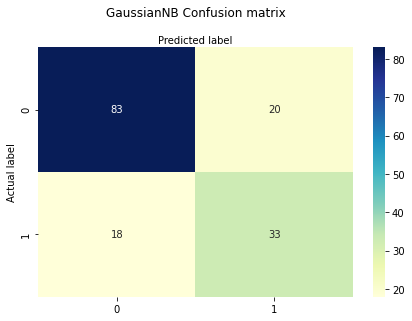

In [23]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('GaussianNB Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
## Problem 3
## K-folds method with Logistic regression

import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
#sns.pairplot(dataset,hue = 'Outcome')
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
classifier = LogisticRegression(random_state=42)

metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
results1 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
results2 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [25]:
print("Accuracy  (K=5): ",results1['test_accuracy'].mean(), " &   Accuracy  (K=10): ",results2['test_accuracy'].mean()) 
print("Precision (K=5): ",results1['test_precision'].mean()," &   Precision (K=10): ",results2['test_precision'].mean())
print("Recall    (K=5): ",results1['test_recall'].mean(),   " &   Recall    (K=10): ",results2['test_recall'].mean())

Accuracy  (K=5):  0.7682454800101859  &   Accuracy  (K=10):  0.7707621326042379
Precision (K=5):  0.7155969191270859  &   Precision (K=10):  0.7173983781918565
Recall    (K=5):  0.5726989972369619  &   Recall    (K=10):  0.5800508774379743


In [26]:
## Problem 4
## K-folds with naive bayes
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)
classifier = GaussianNB()

metrics = ['accuracy', 'precision', 'recall']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
results3 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
results4 = cross_validate(classifier, X, Y, scoring=metrics, cv=kf, n_jobs=-1)

In [27]:
print("Accuracy  (K=5): "
print("Accuracy  (K=5): ",results3['test_accuracy'].mean(), " &   Accuracy  (K=10): ",results4['test_accuracy'].mean()) 
print("Precision (K=5): ",results3['test_precision'].mean()," &   Precision (K=10): ",results4['test_precision'].mean())
print("Recall    (K=5): ",results3['test_recall'].mean(),  "  &   Recall    (K=10): ",results4['test_recall'].mean())

Accuracy  (K=5):  0.7539258127493421  &   Accuracy  (K=10):  0.7512303485987697
Precision (K=5):  0.6645294767870302  &   Precision (K=10):  0.6537815101446814
Recall    (K=5):  0.6011292482940126   &   Recall    (K=10):  0.5938748312619281
